<div style="border: 5px solid purple; padding: 10px; margin: 5px">
<b> Svetlana's comment 2 </b>


Thank you for the updates! You can find my new comments with digit 2. You did a great job here! You learned how to build and evaluate models to predict used car prices. You have successfully conducted EDA, handled missing values and outliers. You trained and tuned several models, compared their RMSE and speed, and chose the best model for the final testing. You learned how to prepare and encode large data and how to weigh training speed vs. prediction error, and why this matters in real-world applications. I hope you enjoyed this project! I do not have any questions, so the project can be accepted. Good luck! 

    
</div>

<div style="border: 5px solid purple; padding: 10px; margin: 5px">
<b>   Svetlana's comment  </b>
      
Hi Michael, my name is Svetlana (https://hub.tripleten.com/u/6dee602c). Congratulations on submitting another project! 🎉 I will be using the standard the color marking:
    

   
    
<div style="border: 5px solid green; padding: 10px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
    

- Excluded some irrelevant columns to reduce computational cost;
    
    
- Encoded cetegorical columns;    

      
    
- Trained and compared several models, great!

    
- Measured their training and prediction speed.
   

- Tuned hyperparameters. We tune them to identify the hyperparameters that will yield the desired metric value;


- Analyzed metrics. It is not enough to just fit the model and print the result. Instead, we have to analyze the results as it helps us identify what can be improved;
  
    
- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. For instance,

  
- Check the data for the duplicates after you drop columns. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same;



- Please explore distributions. Are there any other  outliers?


   
- Please don't fit scaler to the test subset;
  



      
- Please don't use the test subset until the final test for the reason I stated in one of my comments;

    
    
- In the very end of the project, choose the best model (the one that yielded the best RMSE and good prediction speed or 2 if they have the same metric values) and run the final test;



There may be other issues that need your attention. I described everything in my comments.  
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> great job here! You demonstrated strong analytical and modeling skills by preparing the data, experimenting with multiple advanced models, and evaluating them with appropriate metrics. The conclusion clearly communicates which model offers the best trade-off between speed and RMSE. There are several issues that need your attention. Please take a look at my comments and do not hesitate to ask questions if some of them seem unclear. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr> 
    
✍️ Some notes:


- Here's a link to [Supervised Learning documenation sections](https://scikit-learn.org/stable/supervised_learning.html) that you may find useful.



- There are advanced tools such as [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) and [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). `ColumnTransformer` and `Pipeline` are essential tools that help us create robust, maintainable, and efficient machine learning workflows. They work with data much more effectively. You can handle different data types and it is much easier to avoid data leakage. The code organization is very clean, but it may seem a bit difficult at the beginning. Take a look at this page to learn how to [organize a pipeline with ColumnTransformer](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html).  
<hr>
    
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs Feel free to book 1-1 session [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions on TripleTen Hub if you need assistance 😉 
</div>

## Note Before Running All Cells

My XGBoost model took nearly 45 minutes to run. If there is an issue in the code that you can see prior to running it I would recommend flagging that. I even moved to a more powerful system as my computer would slow down and time out after long training sessions on that model.

After making modifications from round 1 of review, XGBoost now only takes about 30 or so minutes to run, still long but much improved and with even better results compared to the first round!

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Yes, these models take a lot of time.     
</div>

# Project Introduction

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
'''
I used %%time for each model, but found using the time.time()
function easier to compare results of different model hyperparameters
'''
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

## Data preparation

In [50]:
df = pd.read_csv('/datasets/car_data.csv')
df.columns = df.columns.str.lower()
df = df.rename(columns = {'datecrawled':'date_crawled', 'vehicletype':'vehicle_type', 'registrationmonth':'registration_month',
                         'registrationyear':'registration_year','fueltype':'fuel_type', 'notrepaired':'not_repaired',
                         'datecreated':'date_created','numberofpictures':'number_of_pictures',
                         'postalcode':'postal_code', 'lastseen':'last_seen'})
df.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
You can also convert columns to snake case using the following piece of code: 
    
    
    df.columns = df.columns.str.replace(r'(?<!^)(?=[A-Z])', '_', regex=True).str.lower()

    
</div>

In [51]:
df.isnull().sum()/len(df) * 100

date_crawled           0.000000
price                  0.000000
vehicle_type          10.579368
registration_year      0.000000
gearbox                5.596709
power                  0.000000
model                  5.560588
mileage                0.000000
registration_month     0.000000
fuel_type              9.282697
brand                  0.000000
not_repaired          20.079070
date_created           0.000000
number_of_pictures     0.000000
postal_code            0.000000
last_seen              0.000000
dtype: float64

In [52]:
df.duplicated().sum()/len(df) * 100

0.07393423239617461

In [53]:
df = df.drop_duplicates()
df.duplicated().sum() / len(df) * 100

0.0

In [54]:
missing_cols = ['not_repaired', 'vehicle_type', 'fuel_type', 'gearbox', 'model']
for col in missing_cols:
    df[col].fillna('missing', inplace=True)

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
It's a good decision to fill in the gaps with some unique value, it's better than deleting them. Moreover, it is normal that sometimes sellers do not specify some information. The model should "know" about such cases. We even should not use median or mode. Even though the median does not skew the distribution, we have to many missing values to fill in because there is a risk of biasing the data.   
    
</div>

In [55]:
df['date_crawled'] = pd.to_datetime(df['date_crawled'], errors = 'coerce')
df['last_seen'] = pd.to_datetime(df['last_seen'], errors = 'coerce')
df['date_created'] = pd.to_datetime(df['date_created'], errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354107 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354107 non-null  datetime64[ns]
 1   price               354107 non-null  int64         
 2   vehicle_type        354107 non-null  object        
 3   registration_year   354107 non-null  int64         
 4   gearbox             354107 non-null  object        
 5   power               354107 non-null  int64         
 6   model               354107 non-null  object        
 7   mileage             354107 non-null  int64         
 8   registration_month  354107 non-null  int64         
 9   fuel_type           354107 non-null  object        
 10  brand               354107 non-null  object        
 11  not_repaired        354107 non-null  object        
 12  date_created        354107 non-null  datetime64[ns]
 13  number_of_pictures  354107 no

Data has been loaded, duplicates have been dropped, missing data has been filled in with 'missing', and I converted date_crawled, date_created, and last_seen columns to datetime for feature engineering later on in model training and analysis.

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Do you need these dates? Will they influence the price?     
</div>

<div class="alert alert-block alert-info">
deleted difference dates, after further thought they would have no impact on price
</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
Good. It's actually great that you introduce new features. With the dates, however, it's hard to figure out something useful. We can calculate the age of a listing though. If a car is not being sold for a long time, it can be an indicator that the car is overpriced. 

</div>

In [9]:
df.describe()

,price,registration_year,power,mileage,registration_month,number_of_pictures,postal_code
count,354107.000000,354107.000000,354107.000000,354107.000000,354107.000000,354107.0,354107.000000
mean,4416.433287,2004.235355,110.089651,128211.811684,5.714182,0.0,50507.145030
std,4514.338584,90.261168,189.914972,37906.590101,3.726682,0.0,25784.212094
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49406.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Text(0.5, 1.0, 'Power - Box')

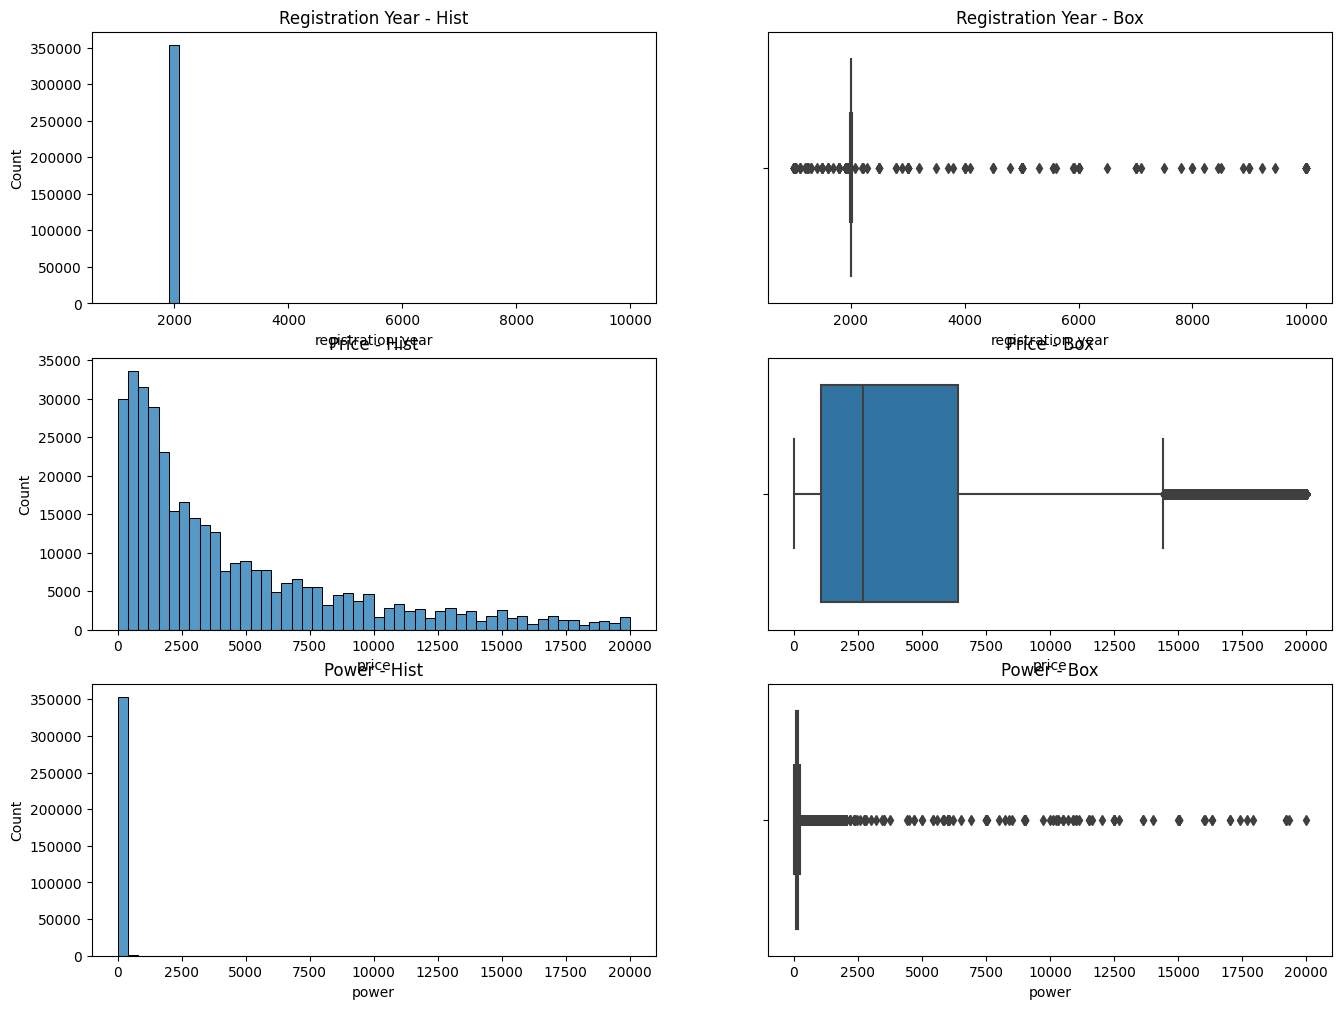

In [57]:
plt.figure(figsize = (16, 12))
plt.tight_layout()

plt.subplot(3, 2, 1)
sns.histplot(df['registration_year'], bins = 50, kde = False)
plt.title('Registration Year - Hist')
plt.subplot(3, 2, 2)
sns.boxplot(x = df['registration_year'])
plt.title('Registration Year - Box')

plt.subplot(3, 2, 3)
sns.histplot(df['price'], bins = 50, kde = False)
plt.title('Price - Hist')
plt.subplot(3, 2, 4)
sns.boxplot(x = df['price'])
plt.title('Price - Box')

plt.subplot(3, 2, 5)
sns.histplot(df['power'], bins = 50, kde = False)
plt.title('Power - Hist')
plt.subplot(3, 2, 6)
sns.boxplot(x = df['power'])
plt.title('Power - Box')

These plots show a large amount of outliers in registration year as well as power. We'll have to work with those outliers, but price seems to be realistic outside of some extremely low values, which we'll also deal with below.

In [11]:
outlier_years = (df['registration_year'] <= 1900) | (df['registration_year'] > 2025)
outlier_years.sum()

171

In [12]:
df = df[(df['registration_year'] >= 1900) & (df['registration_year'] <= 2025)]
print(df['registration_year'].min(), df['registration_year'].max())

1910 2019


Logically, cars could not be registered before roughly 1900 or after 2025, so any years outside of that window were dropped. These rows accounted for less than 0.05% of the entire dataset, so it should not make a meaningful impact on the model performance by removing these.

In [13]:
df[df['price'] < 1000]['price'].value_counts().sort_index().head(20)

0     10738
1      1180
2        12
3         8
4         1
5        26
7         3
8         9
9         8
10       84
11        5
12        8
13        7
14        5
15       27
16        2
17        5
18        3
19        3
20       50
Name: price, dtype: int64

In [14]:
df['low_price'] = (df['price'] < 300).astype(int)
df.loc[df['low_price'] == 1, 'price'] = np.nan
df['price'] = df.groupby('model')['price'].transform(lambda x: x.fillna(x.median()))
df['price'] = df.groupby('brand')['price'].transform(lambda x: x.fillna(x.median()))

In [15]:
df[df['price'] < 300]['price'].value_counts().sort_index().head(20)

Series([], Name: price, dtype: int64)

I chose 300 Euros as the minimum price as some older cars that have a lot of miles or are not repaired may only be sold for parts, prices lower than that were flagged and filled in with the median of either the model or brand (whichever was present), to be much more representative of similar models and brands.

In [16]:
outlier_power = (df['power'] <= 50) | (df['power'] >= 400)
outlier_power.sum()

51432

In [17]:
df['outlier_power'] = ((df['power'] <= 50) | (df['power'] >= 400)).astype(int)
df.loc[df['outlier_power'] == 1, 'power'] = np.nan
df['power'] = df.groupby('model')['power'].transform(lambda x: x.fillna(x.median()))
df['power'] = df.groupby('brand')['power'].transform(lambda x: x.fillna(x.median()))
df['power'].fillna(df['power'].median(), inplace = True)
outlier_power = (df['power'] <= 50) | (df['power'] >= 400)
outlier_power.sum()

/.venv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/.venv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


0

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
Great job! 
</div>

A quick google search showed that most cars, trucks, and SUV's sit between 100 and 400 horsepower on average. As I saw there were some European cars in the dataset, I imagined some of them may be below 100 horsepower, so I set the minimum threshold to 50 horsepower. Similar to how I flagged and filled in price data, I used the model, brand, and if neither one of those were present, the dataset median as a final backup to replace any outliers in the set.

In [18]:
df[['registration_year', 'price', 'power']].describe()

,registration_year,price,power
count,353936.000000,353936.000000,353936.000000
mean,2003.084846,4570.975456,119.437465
std,7.537331,4425.615952,50.119705
min,1910.000000,300.000000,51.000000
25%,1999.000000,1300.000000,77.000000
50%,2003.000000,2900.000000,110.000000
75%,2008.000000,6450.000000,143.000000
max,2019.000000,20000.000000,399.000000


<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

- However, even though the median does not skew the distribution, we have too many missing values to fill in because there is a risk of biasing the data. Consider grouping data by model. 
    


- Are there any outliers in the data?  Please call the `describe` method and display charts. Drop abnormal values if they exist. Hint: `year`, `price`, and `power` columns definitely have outliers. Look at the lower and upper boundaries. 
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

Consider analyzing categories as well. Petrol and gasoline refer to the same fuel, so we can use one of these categories. There are also some rare model categories that can be dropped. If a category appears only in the training or validation subset, for instance, and we use `handle_unknown='ignore'`, the linear model might miss important signals in validation or make predictions with incomplete features thus breaking the assumptions of linearity. It may be helpful to make sure that training and validation subsets use the same feature columns after encoding. 
</div>

<div class="alert alert-block alert-info">
running describe makes a lot more sense now! the quartiles make sense as well as the max and min values!
</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
This is a very useful method, so I recommend using it all the time :) 

</div>

In [20]:
df.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'number_of_pictures', 'postal_code',
       'last_seen', 'low_price', 'outlier_power'],
      dtype='object')

In [21]:
df = df.drop(['date_crawled', 'registration_month', 'date_created', 
              'number_of_pictures', 'postal_code', 'last_seen'], axis = 1)
df.head()

,price,vehicle_type,registration_year,gearbox,power,model,mileage,fuel_type,brand,not_repaired,low_price,outlier_power
0,480.0,missing,1993,manual,101.0,golf,150000,petrol,volkswagen,missing,0,1
1,18300.0,coupe,2011,manual,190.0,missing,125000,gasoline,audi,yes,0,0
2,9800.0,suv,2004,auto,163.0,grand,125000,gasoline,jeep,missing,0,0
3,1500.0,small,2001,manual,75.0,golf,150000,petrol,volkswagen,no,0,0
4,3600.0,small,2008,manual,69.0,fabia,90000,gasoline,skoda,no,0,0


In [29]:
df.columns

Index(['price', 'vehicle_type', 'registration_year', 'gearbox', 'power',
       'model', 'mileage', 'fuel_type', 'brand', 'not_repaired', 'low_price',
       'outlier_power'],
      dtype='object')

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Agreed! We don't need these columns. 
    
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

    
- All dates except year can also be dropped, as they do not do anything with price. It will significantly simplify the training process. 


- Another option is to drop `VehicleType` and `Brand`, since we have `Model` that should reflect both. 

</div>
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
   
After removing unnecessary columns, it makes sense to check the data for duplicates again, as the dataset will later be splitted into training and test sets. Removing specific columns can cause previously distinct rows to become identical. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same.   
   
</div>

In [22]:
df.duplicated().sum()/len(df) * 100

13.781587631662221

In [23]:
df = df.drop_duplicates()
df.duplicated().sum() / len(df) * 100

0.0

<div class="alert alert-block alert-info">
df rechecked for newly duplicated data and dropped
</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Correct. Yes, there are a lot of duplicates, but we cannot do anything with them. 

</div>

In [24]:
#create a copy of the original df for all model testing/comparison
df_cleaned = df.copy()

In [25]:
X = df.drop(columns = ['price'])
y = df['price']

In [26]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2356)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size = 0.25, random_state = 2356)

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Perfect! 
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>
    
Consider saving at least one subset for the final testing. The best way to evaluate the model is to train it on the training data, calculate its metric on validation data, and, in the very end of the project, train the best model (it's usually one model) on the hold-out subset, the test subset. In this case, we need 3 subsets. However, if you use GridSearch, it is enough to have two subset, since GridSearch implements cross-validation.
</div>

## Model training

### Linear Regression (baseline)

In [28]:
#OHE 
cat_columns = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

X_train = pd.get_dummies(X_train, columns = cat_columns, drop_first = True)
X_valid = pd.get_dummies(X_valid, columns = cat_columns, drop_first = True)
X_test = pd.get_dummies(X_test, columns = cat_columns, drop_first = True)

X_train, X_valid = X_train.align(X_valid, join = 'left', axis = 1, fill_value = 0)
X_train, X_test = X_train.align(X_test, join = 'left', axis = 1, fill_value = 0)

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
I see you encode data after you split it with the `get_dummies` now, great! It is correct that you align dataframes. Without explicit `fit` and `transform` methods, applying `get_dummies` from `pandas` before splitting the data can potentially lead to data leakage and mismatched features. That's why it is important to use it correctly, as you do above. 

</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Yes, we need to encode data here, well done! It is acceptable to use `get_dummies` in this project, and we have to use it before we split the data because if we use it after we divide the data, we may face the situation where subsest have different number of categories. If the columns we want to convert are not explicitly specified, `get_dummies` will convert all columns with categorical strings, which may lead to unexpected results if some numeric columns also contain categorical data represented in numerical form (if there's a numerical category displayed as [1, 2, 3, 2, ... ]), so well done! 

    
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Please note that `OneHotEncoder(handle_unknown='ignore')` or `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)` are generally more robust than `get_dummies` because they can handle situations where test subset has features that were not available during training. [Difference between OneHotEncoder and get_dummies](https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/). 
    
    
    
For tree-based models, `OrdinalEncoder` is a better choice because of computational cost. For boosting algorithms, we can rely on internal encoders that usually perform even better than external ones. For `CatBoost`, this is controlled by the `cat_features` parameter. For `LightGBM`, you can convert categorical features to the category type, allowing the model to handle them automatically.
    
   

    
`OrdinalEncoder()` or `LabelEncoder()` should not be used with linear models if there's no ordinal relationship. [How and When to Use Ordinal Encoder](https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c). For linear regresison, I recommend using `OneHotEncoder(handle_unknown='ignore')`. 


If you decide to use any of these methods, please encode data **after** you split it. 

    
    
    
For instance, you can use `Ordinal` for Forest and Tree, `OneHotEncoder` for Lin. Regression and categorical data types for boosting models.
</div>



In [30]:
numeric_columns = ['power', 'mileage', 'registration_year']

scaler = StandardScaler()

X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

X_valid[numeric_columns] = scaler.transform(X_valid[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Now it's correct! 
</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
It is great that you scale data after you split it to prevent data leakage.
</div>
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
However, do we fit scaler to the test subset?    
</div>

<div class="alert alert-block alert-info">
altered code to fit and transform to training set only, just used scaler.transform on the validation and test sets!
</div>

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Please drop these columns first, then check the data for the duplicates and then split the data. Otherwise, it will be hard to look for the duplicates, as you will need all columns, including Price.     
</div>

<div class="alert alert-block alert-info">
deleted the block above:
X_train = X_train.drop(['date_crawled', 'last_seen', 'date_created'], axis=1, errors='ignore')
X_test = X_test.drop(['date_crawled', 'last_seen', 'date_created'], axis=1, errors='ignore')
</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Good. 
</div>

In [33]:
%%time

lr = LinearRegression()
start_train = time.time()
lr.fit(X_train, y_train)
end_train = time.time()

start_pred = time.time()
predictions = lr.predict(X_valid)
end_pred = time.time()

rmse = mean_squared_error(y_valid, predictions) ** 0.5
lr_results = pd.DataFrame([{'train_time': round(end_train - start_train, 2),
            'predict_time': round(end_pred - start_pred, 2),
            'rmse': round(rmse, 2)}])

lr_results

CPU times: user 8.96 s, sys: 3.75 s, total: 12.7 s
Wall time: 6.73 s


,train_time,predict_time,rmse
0,6.63,0.1,2764.3


After calculating the RMSE from my Linear Regression model, I got a value of 2764.3 Euros, meaning this current model, which I'll treat as the baseline, is off by about 2800 Euros on average. We'll look to improve that with a Random Forest model and XGBoost, LightGBM, and CatBoost gradient boosted models next.

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Please don't use the test subset until you choose the best model. Use training or validation instead.

</div>

<div class="alert alert-block alert-info">
fixed for all models!
</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Good! 
</div>

### Random Forest Model

In [35]:
%%time

X = df_cleaned.drop(columns = ['price'])
y = df_cleaned['price']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2356)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size = 0.25, random_state = 2356)

#OHE for RF model
cat_columns = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

X_train = pd.get_dummies(X_train, columns = cat_columns, drop_first = True)
X_valid = pd.get_dummies(X_valid, columns = cat_columns, drop_first = True)
X_test = pd.get_dummies(X_test, columns = cat_columns, drop_first = True)

X_train, X_valid = X_train.align(X_valid, join = 'left', axis = 1, fill_value = 0)
X_train, X_test = X_train.align(X_test, join = 'left', axis = 1, fill_value = 0)

parameters = [
    {'n_estimators': 50, 'max_depth': 10, 'min_samples_leaf': 2},
    {'n_estimators': 100, 'max_depth': 20, 'min_samples_leaf': 1},
    {'n_estimators': 75, 'max_depth': 20, 'min_samples_leaf': 3}
]

def rf_model_eval(X_train, y_train, X_valid, y_valid, parameters):
    results = []
    for i, parameter in enumerate(parameters):
        print(f"Evaluating set {i+1}/{len(parameters)}: {parameter}")
        rf = RandomForestRegressor(**parameter, random_state = 2356)

        start_train = time.time()
        rf.fit(X_train, y_train)
        end_train = time.time()

        start_pred = time.time()
        predictions = rf.predict(X_valid)
        end_pred = time.time()

        rmse = mean_squared_error(y_valid, predictions) ** 0.5

        results.append({
            'parameters': parameter,
            'train_time': round(end_train - start_train, 2),
            'predict_time': round(end_pred - start_pred, 2),
            'rmse': round(rmse, 2)
        })
    return pd.DataFrame(results).sort_values(by = 'rmse')
    
rf_results = rf_model_eval(X_train, y_train, X_valid, y_valid, parameters)
rf_results

Evaluating set 1/3: {'n_estimators': 50, 'max_depth': 10, 'min_samples_leaf': 2}
Evaluating set 2/3: {'n_estimators': 100, 'max_depth': 20, 'min_samples_leaf': 1}
Evaluating set 3/3: {'n_estimators': 75, 'max_depth': 20, 'min_samples_leaf': 3}
CPU times: user 6min 38s, sys: 736 ms, total: 6min 39s
Wall time: 6min 39s


,parameters,train_time,predict_time,rmse
2,"{'n_estimators': 75, 'max_depth': 20, 'min_sam...",138.86,0.86,1749.69
1,"{'n_estimators': 100, 'max_depth': 20, 'min_sa...",188.54,1.22,1750.32
0,"{'n_estimators': 50, 'max_depth': 10, 'min_sam...",68.96,0.28,2022.03


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Correct. The validation subset was introduced, so you can use it here to cacculate RMSE. 

</div>
<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
You have successfully implemented hyperparameters tuning, well done!     
</div>

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
- Since you don't have validation subset, consider using GridSearch. 


- Don't use the test subset please.

- Drop columns and duplicates first, then split the data.</div>

I trained a Random Forest model on the dataset and while it was significantly slower than Linear Regression, the best RMSE score was much improved over the LR model. It taking a little over minutes to train and predict for the best result is certainly a trade off as well, so I'll look to continue improving both speed and RMSE in the gradient boosting methods next.

### LightGBM

In [37]:
%%time

X = df_cleaned.drop(columns = ['price'])
y = df_cleaned['price']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2356)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size = 0.25, random_state = 2356)

cat_columns = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

X_train = pd.get_dummies(X_train, columns = cat_columns, drop_first = True)
X_valid = pd.get_dummies(X_valid, columns = cat_columns, drop_first = True)
X_test = pd.get_dummies(X_test, columns = cat_columns, drop_first = True)

X_train, X_valid = X_train.align(X_valid, join = 'left', axis = 1, fill_value = 0)
X_train, X_test = X_train.align(X_test, join = 'left', axis = 1, fill_value = 0)

parameters = [
    {'n_estimators': 1000, 'learning_rate': 0.05, 'max_depth': 15},
    {'n_estimators': 500, 'learning_rate': 0.075, 'max_depth': 10},
    {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 6}
]

def lgbm_model_eval(X_train, y_train, X_valid, y_valid, parameters):
    results = []
    for i, parameter in enumerate(parameters):
        print(f"Evaluating set {i+1}/{len(parameters)}: {parameter}")
        lgbm = LGBMRegressor(**parameter, random_state = 2356, n_jobs = -1)

        start_train = time.time()
        lgbm.fit(X_train, y_train)
        end_train = time.time()

        start_pred = time.time()
        prediction = lgbm.predict(X_valid)
        end_pred = time.time()

        rmse = mean_squared_error(y_valid, prediction) ** 0.5

        results.append({
            'parameters': parameter,
            'train_time': round(end_train - start_train, 2),
            'predict_time': round(end_pred - start_pred, 2),
            'rmse': round(rmse, 2)
        })
    return pd.DataFrame(results).sort_values(by = 'rmse')
    
lgbm_results = lgbm_model_eval(X_train, y_train, X_valid, y_valid, parameters)
lgbm_results

Evaluating set 1/3: {'n_estimators': 1000, 'learning_rate': 0.05, 'max_depth': 15}
Evaluating set 2/3: {'n_estimators': 500, 'learning_rate': 0.075, 'max_depth': 10}
Evaluating set 3/3: {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 6}
CPU times: user 51.2 s, sys: 619 ms, total: 51.8 s
Wall time: 26.7 s


,parameters,train_time,predict_time,rmse
0,"{'n_estimators': 1000, 'learning_rate': 0.05, ...",11.82,2.42,1685.58
1,"{'n_estimators': 500, 'learning_rate': 0.075, ...",6.77,0.90,1705.16
2,"{'n_estimators': 300, 'learning_rate': 0.1, 'm...",3.80,0.51,1763.99


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Good. 
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
You don't need to repeat the code though. 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Same issues. 
</div>

I trained a LightGBM on various hyperparameters, similar to my Random Forest model training, and the results were very impressive. The best resulting model took twice as long as LR to train and predict (~14 seconds vs ~7), but it was a vast improvement over baseline and even improved on the RF model as well. The two "worse" hyperparameter sets here took even less time than LR, and still maintained a much improved RMSE score in both cases.

### XGBoost Model

In [41]:
%%time
'''
This code took nearly 45 minutes to run
I'm not sure if there's an issue with my parameters or my function,
but the results are certainly not worth the runtime compared to LightGBM. Results below
Parameter set 1: train_time: 659s, predict_time: 0.79s, RMSE: 1743.50
Parameter set 2: train_time: 911s, predict_time: 1.05s, RMSE: 1740.96
Parameter set 3: train_time: 956s, predict_time: 1s, RMSE: 1727.28
'''

X = df_cleaned.drop(columns = ['price'])
y = df_cleaned['price']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2356)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size = 0.25, random_state = 2356)

cat_columns = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

X_train = pd.get_dummies(X_train, columns = cat_columns, drop_first = True)
X_valid = pd.get_dummies(X_valid, columns = cat_columns, drop_first = True)
X_test = pd.get_dummies(X_test, columns = cat_columns, drop_first = True)

X_train, X_valid = X_train.align(X_valid, join = 'left', axis = 1, fill_value = 0)
X_train, X_test = X_train.align(X_test, join = 'left', axis = 1, fill_value = 0)

parameters = [
    {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 6},
    {'n_estimators': 500, 'learning_rate': 0.05, 'max_depth': 6, 'subsample': 0.8, 'colsample_bytree': 0.8},
    {'n_estimators': 300, 'learning_rate': 0.05, 'max_depth': 8, 'min_child_weight': 5, 'gamma': 0.1}
]

def xgb_model_eval(X_train, y_train, X_valid, y_valid, parameters):
    results = []
    for i, parameter in enumerate(parameters):
        print(f"Evaluating set {i+1}/{len(parameters)}: {parameter}")
        xgb = XGBRegressor(**parameter, random_state = 2356, n_jobs = -1)

        start_train = time.time()
        xgb.fit(X_train, y_train, eval_set = [(X_valid, y_valid)],
              early_stopping_rounds = 25, verbose = False)
        end_train = time.time()
        
        start_pred = time.time()
        prediction = xgb.predict(X_valid)
        end_pred = time.time()
        
        rmse = mean_squared_error(y_valid, prediction) ** 0.5
        results.append({
            'parameters': parameter,
            'train_time': round(end_train - start_train, 2),
            'predict_time': round(end_pred - start_pred, 2),
            'rmse': round(rmse, 2)
        })
    return pd.DataFrame(results).sort_values(by = 'rmse')
   
xgb_results = xgb_model_eval(X_train, y_train, X_valid, y_valid, parameters)
xgb_results

Evaluating set 1/3: {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 6}
Evaluating set 2/3: {'n_estimators': 500, 'learning_rate': 0.05, 'max_depth': 6, 'subsample': 0.8, 'colsample_bytree': 0.8}
Evaluating set 3/3: {'n_estimators': 300, 'learning_rate': 0.05, 'max_depth': 8, 'min_child_weight': 5, 'gamma': 0.1}
CPU times: user 56min 3s, sys: 3.29 s, total: 56min 6s
Wall time: 28min 6s


,parameters,train_time,predict_time,rmse
2,"{'n_estimators': 300, 'learning_rate': 0.05, '...",620.19,0.53,1724.79
1,"{'n_estimators': 500, 'learning_rate': 0.05, '...",626.84,0.63,1741.37
0,"{'n_estimators': 300, 'learning_rate': 0.1, 'm...",437.07,0.41,1747.36



<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Same issues. 
</div>

Unfortunately the XGBoost was extremely slow in training time, and it took nearly 30 minutes to train all 3 sets of hyperparameters. It showed very strong prediction times, with all three under three quarters of a second, but the RMSE value increased compared to LGBM. This, in conjunction with the massive time to train, leads me to believe XGB is not the right choice for our model.

### CatBoost Model

In [39]:
%%time
X = df_cleaned.drop(columns = ['price'])
y = df_cleaned['price']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2356)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size = 0.25, random_state = 2356)

cat_columns = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']
for col in cat_columns:
    X_train[col] = X_train[col].astype('category')
    X_valid[col] = X_valid[col].astype('category')
    X_test[col] = X_test[col].astype('category')

parameters = [
    {'iterations': 100, 'learning_rate': 0.2, 'depth': 4},
    {'iterations': 150, 'learning_rate': 0.1, 'depth': 10},
    {'iterations': 400, 'learning_rate': 0.05, 'depth': 6, 'l2_leaf_reg': 10}
]

def cb_model_eval(X_train, y_train, X_valid, y_valid, cat_features, parameters):
    results = []
    for i, parameter in enumerate(parameters):
        print(f"Evaluating CatBoost set {i+1}/{len(parameters)}: {parameter}")
        model = CatBoostRegressor(
            **parameter,
            loss_function='RMSE',
            random_seed=2356,
            verbose=False
        )
        
        start_train = time.time()
        model.fit(X_train, y_train, cat_features=cat_features, 
                  eval_set=(X_valid, y_valid), early_stopping_rounds=25)
        end_train = time.time()

        start_pred = time.time()
        prediction = model.predict(X_valid)
        end_pred = time.time()

        rmse = mean_squared_error(y_valid, prediction) ** 0.5

        results.append({
            'parameters': parameter,
            'train_time': round(end_train - start_train, 2),
            'predict_time': round(end_pred - start_pred, 2),
            'rmse': round(rmse, 2)
        })
    return pd.DataFrame(results).sort_values(by='rmse')

cb_results = cb_model_eval(X_train, y_train, X_valid, y_valid, cat_columns, parameters)
cb_results

<timed exec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Evaluating CatBoost set 1/3: {'iterations': 100, 'learning_rate': 0.2, 'depth': 4}
Evaluating CatBoost set 2/3: {'iterations': 150, 'learning_rate': 0.1, 'depth': 10}
Evaluating CatBoost set 3/3: {'iterations': 400, 'learning_rate': 0.05, 'depth': 6, 'l2_leaf_reg': 10}
CPU times: user 1min 24s, sys: 563 ms, total: 1min 25s
Wall time: 44.1 s


,parameters,train_time,predict_time,rmse
1,"{'iterations': 150, 'learning_rate': 0.1, 'dep...",6.96,0.04,1715.78
2,"{'iterations': 400, 'learning_rate': 0.05, 'de...",34.44,0.07,1774.99
0,"{'iterations': 100, 'learning_rate': 0.2, 'dep...",2.33,0.03,1885.78


CatBoost is another impressive and quick model. It had relatively speedy training times, lightning fast prediction times, and a solid RMSE range that placed it in the ballpark of Random Forest, based on the hyperparameters I chose.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Nice results. 
</div>

## Model analysis

In [42]:
#create df comparing the best RMSE result from each run along with their training and prediction times

model_rmse_summary = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'LightGBM', 'XGBoost', 'CatBoost'],
    'RMSE': [
        lr_results['rmse'].values[0],
        rf_results['rmse'].values[0],
        lgbm_results['rmse'].values[0],
        xgb_results['rmse'].values[0],
        cb_results['rmse'].values[0]
    ],
    'Train Time (s)': [
        lr_results['train_time'].values[0],
        rf_results['train_time'].values[0],
        lgbm_results['train_time'].values[0],
        xgb_results['train_time'].values[0],
        cb_results['train_time'].values[0]
    ],
    'Predict Time (s)': [
        lr_results['predict_time'].values[0],
        rf_results['predict_time'].values[0],
        lgbm_results['predict_time'].values[0],
        xgb_results['predict_time'].values[0],
        cb_results['predict_time'].values[0]
    ]
}).sort_values(by = 'RMSE').reset_index(drop = True)

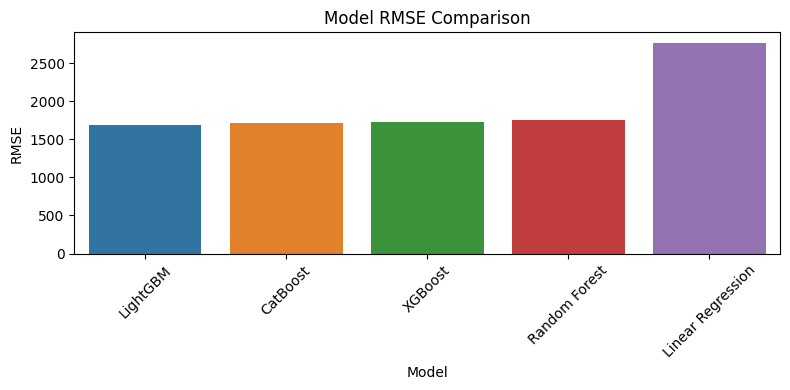

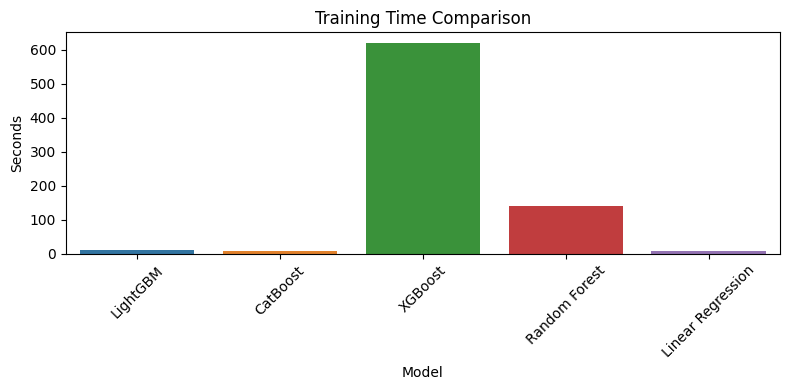

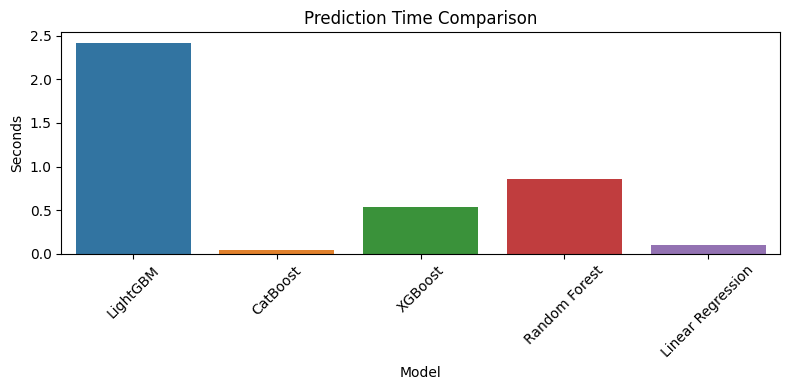

In [43]:
#RMSE plot
plt.figure(figsize = (8, 4))
sns.barplot(data = model_rmse_summary, x = 'Model', y = 'RMSE')
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#training time plot
plt.figure(figsize = (8, 4))
sns.barplot(data = model_rmse_summary, x = 'Model', y = 'Train Time (s)')
plt.title('Training Time Comparison')
plt.ylabel('Seconds')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#prediction time plot
plt.figure(figsize = (8, 4))
sns.barplot(data = model_rmse_summary, x = 'Model', y = 'Predict Time (s)')
plt.title('Prediction Time Comparison')
plt.ylabel('Seconds')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


    
- After we train all models, we have to choose the best **one** and check its performance on the test subset. Here we only need to make predictions and calculate RMSE. For the final testing, where we use the test subset to check the model's generalization ability, we should use the best model (one model or two models if they have almost the same metric values). We don't use all models here because even just checking their performance influences our choices. This leads to test set leakage when we unconsciously start picking models that perform well on the test set, making it part of the training loop. In real-world scenarios, the test set is meant to reflect how the final model performs in the wild. In practice, you only deploy one model, not several models, so testing just that final one mirrors reality. Moreover, evaluating every tuned model on the test set (especially with big models or datasets) is expensive and time-consuming. 




- When choosing the best model, we have to consider prediction time as well. The best model isn't always the one with the lowest error. Sometimes the errors are only slightly different, but the prediction time varies significantly. In such cases, it's worth considering a faster model. Think of a slow search engine that finds 10 useful links versus a fast one that finds 9. This is especially important if the model needs to operate in real time and produce results repeatedly. If a program runs just once, its speed might not even matter. But if it’s used continuously, optimization becomes crucial. So, in practice, apart from the other requirements, there are also runtime constraints for the model.

</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
You can compare the results with a constant baseline. For instance, you can take [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html). 

</div>

These three graphs show the comparison of each model I tested for this project. Each model had it's own pros and cons, which I'll discuss in the conclusion, but a quick analysis shows that each one performed better than the Linear Regression (baseline) model in terms of RMSE, which is a clear sign that our models are functioning properly. The final graph, Prediction Time Comparison, may be a bit misleading with the size of the bars, but it does show that the CatBoost model still predicted faster than the LR model did, which is a positive. Next I'll use the CatBoost model and it's best parameter tuning on the test set to see how it performs on unseen data.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Agreed. 
</div>

In [64]:
%%time

X = df_cleaned.drop(columns = ['price'])
y = df_cleaned['price']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2356)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size = 0.25, random_state = 2356)

X_full_train = pd.concat([X_train, X_valid])
y_full_train = pd.concat([y_train, y_valid])

for col in cat_columns:
    X_full_train[col] = X_full_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

model = CatBoostRegressor(
            loss_function='RMSE',
            iterations = 150,
            learning_rate = 0.1,
            depth = 10,
            random_seed = 2356,
            verbose = False
        )
        
start_train = time.time()
model.fit(X_full_train, y_full_train, cat_features = cat_columns)
end_train = time.time()

start_pred = time.time()
prediction = model.predict(X_test)
end_pred = time.time()

rmse = mean_squared_error(y_test, prediction) ** 0.5

test_rmse = pd.DataFrame({
    'Model': ['CatBoost'],
    'RMSE': [round(rmse, 2)],
    'Train Time (s)': [round(end_train - start_train, 2)],
    'Predict Time (s)': [round(end_pred - start_pred, 2)]
}).reset_index(drop = True)

test_rmse

<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 17.1 s, sys: 132 ms, total: 17.2 s
Wall time: 9.04 s


,Model,RMSE,Train Time (s),Predict Time (s)
0,CatBoost,1686.27,8.81,0.04


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Pretty good RMSE! 
</div>

## Conclusion

After comparing all models, my recommendation for Rusty Bargain is the CatBoost model, as I believe it shows the best balance of prediction quality, prediction speed, and training time. After using CatBoost on the test set, it got a similar RMSE as seen during testing, and the total training and prediction time was under 9 seconds, a very quick result as well. LightGBM could be a strong alternative as it showed a slightly better RMSE (1685 vs 1715), while also providing very fast training and prediction times, but a relative difference of about 30 Euros most likely won't upset anyone when determining the value of their car as opposed to having an almost immediate answer, as is the case with the CatBoost model. I would not recommend Linear Regression, Random Forest, or XGBoost for this application, based on much higher RMSE values (in the case of LR) and extremely slow training times (in the case of XGBoost and RF). Overall, I believe the CatBoost model could help improve the new app to bring in new customers to the dealership, as it shows the best combination of quality, speed, and training time.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Excellent job here Michael!
</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
   
Great conclusion! This is a solid final summary with comparison across models.    
</div>    
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

    
You can make it a little broader and add more info about different models you compared. 

</div>  
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Don't forget to update it if needed. 

</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The models have been trained
- [ ]  The analysis of speed and quality of the models has been performed